In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from scipy.stats import ttest_ind

In [2]:
df = pd.read_stata('wlaxscores.dta')


In [3]:
df

,home_team,away_team,home_score,away_score,overtime,number_overtimes,game_date,year,month,day_of_month,day_of_week,neutral_site,tournament_game
0,UC Davis,California,9.0,11.0,0.0,NaN,21224.0,2018.0,2.0,9.0,Friday,0.0,0.0
1,Cincinnati,Louisville,9.0,15.0,0.0,NaN,21224.0,2018.0,2.0,9.0,Friday,0.0,0.0
2,Johns Hopkins,Marquette,14.0,7.0,0.0,NaN,21224.0,2018.0,2.0,9.0,Friday,0.0,0.0
3,Kennesaw State,Arizona State,6.0,14.0,0.0,NaN,21224.0,2018.0,2.0,9.0,Friday,0.0,0.0
4,La Salle,Fresno State,6.0,8.0,0.0,NaN,21224.0,2018.0,2.0,9.0,Friday,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,Stanford,Oregon,17.0,9.0,0.0,NaN,21289.0,2018.0,4.0,15.0,Sunday,0.0,0.0
5423,Saint Joseph's,Duquesne,15.0,4.0,0.0,NaN,21289.0,2018.0,4.0,15.0,Sunday,0.0,0.0
5424,William & Mary,Towson,5.0,17.0,0.0,NaN,21289.0,2018.0,4.0,15.0,Sunday,1.0,0.0
5425,Wofford,Central Michigan,4.0,16.0,0.0,NaN,21289.0,2018.0,4.0,15.0,Sunday,0.0,0.0


In [4]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'overtime',
       'number_overtimes', 'game_date', 'year', 'month', 'day_of_month',
       'day_of_week', 'neutral_site', 'tournament_game'],
      dtype='object')

In [5]:
df.shape

(5427, 13)

In [6]:
df.dtypes

home_team             object
away_team             object
home_score           float32
away_score           float32
overtime             float32
number_overtimes     float32
game_date            float32
year                 float32
month                float64
day_of_month         float32
day_of_week         category
neutral_site         float32
tournament_game      float32
dtype: object

In [7]:
df.isnull().sum()

home_team              0
away_team              0
home_score             5
away_score             5
overtime               0
number_overtimes    5112
game_date              5
year                   0
month                  5
day_of_month           5
day_of_week            5
neutral_site           0
tournament_game        0
dtype: int64

In [8]:
df.dropna(subset=['number_overtimes'], inplace=True)

In [9]:
df.isnull().sum()

home_team           0
away_team           0
home_score          0
away_score          0
overtime            0
number_overtimes    0
game_date           0
year                0
month               0
day_of_month        0
day_of_week         0
neutral_site        0
tournament_game     0
dtype: int64

In [10]:
cleanup_days_of_week  = { 'day_of_week': {'Sunday': 0, 'Monday': 1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}}

In [11]:
df.replace(cleanup_days_of_week, inplace=True)

In [12]:
df

,home_team,away_team,home_score,away_score,overtime,number_overtimes,game_date,year,month,day_of_month,day_of_week,neutral_site,tournament_game
11,James Madison,North Carolina,15.0,14.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0
19,Robert Morris,Bucknell,4.0,5.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0
90,Gardner-Webb,East Carolina,14.0,15.0,1.0,1.0,21233.0,2018.0,2.0,18.0,0,0.0,0.0
131,Jacksonville,Ohio State,17.0,16.0,1.0,1.0,21238.0,2018.0,2.0,23.0,5,0.0,0.0
142,Hofstra,Fairfield,12.0,13.0,1.0,1.0,21239.0,2018.0,2.0,24.0,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,Fairfield,Quinnipiac,11.0,10.0,1.0,1.0,21285.0,2018.0,4.0,11.0,3,0.0,0.0
5351,Rutgers,Michigan,9.0,8.0,1.0,1.0,21286.0,2018.0,4.0,12.0,4,0.0,0.0
5362,La Salle,Duquesne,15.0,14.0,1.0,1.0,21287.0,2018.0,4.0,13.0,5,0.0,0.0
5368,Stanford,Colorado,10.0,11.0,1.0,1.0,21287.0,2018.0,4.0,13.0,5,0.0,0.0


In [13]:
df['Win'] = df['home_score'] > df['away_score']

In [14]:
df['Win']

11       True
19      False
90      False
131      True
142     False
        ...  
5340     True
5351     True
5362     True
5368    False
5408    False
Name: Win, Length: 315, dtype: bool

In [15]:
df

,home_team,away_team,home_score,away_score,overtime,number_overtimes,game_date,year,month,day_of_month,day_of_week,neutral_site,tournament_game,Win
11,James Madison,North Carolina,15.0,14.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0,True
19,Robert Morris,Bucknell,4.0,5.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0,False
90,Gardner-Webb,East Carolina,14.0,15.0,1.0,1.0,21233.0,2018.0,2.0,18.0,0,0.0,0.0,False
131,Jacksonville,Ohio State,17.0,16.0,1.0,1.0,21238.0,2018.0,2.0,23.0,5,0.0,0.0,True
142,Hofstra,Fairfield,12.0,13.0,1.0,1.0,21239.0,2018.0,2.0,24.0,6,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,Fairfield,Quinnipiac,11.0,10.0,1.0,1.0,21285.0,2018.0,4.0,11.0,3,0.0,0.0,True
5351,Rutgers,Michigan,9.0,8.0,1.0,1.0,21286.0,2018.0,4.0,12.0,4,0.0,0.0,True
5362,La Salle,Duquesne,15.0,14.0,1.0,1.0,21287.0,2018.0,4.0,13.0,5,0.0,0.0,True
5368,Stanford,Colorado,10.0,11.0,1.0,1.0,21287.0,2018.0,4.0,13.0,5,0.0,0.0,False


In [16]:
team_wins = df[['home_team','Win']]
team_wins

,home_team,Win
11,James Madison,True
19,Robert Morris,False
90,Gardner-Webb,False
131,Jacksonville,True
142,Hofstra,False
...,...,...
5340,Fairfield,True
5351,Rutgers,True
5362,La Salle,True
5368,Stanford,False


In [17]:
df.dtypes

home_team            object
away_team            object
home_score          float32
away_score          float32
overtime            float32
number_overtimes    float32
game_date           float32
year                float32
month               float64
day_of_month        float32
day_of_week           int64
neutral_site        float32
tournament_game     float32
Win                    bool
dtype: object

In [17]:
teamdf = team_wins.groupby('Win')
team_wins_ = teamdf.count()

In [19]:
team_wins_

,home_team
Win,
False,154
True,161


In [20]:
team_wins_.reset_index(inplace= True)


In [18]:
team_wins_.values

array([[154],
       [161]])

In [62]:
from statsmodels.stats.power import TTestIndPower
effect_size = 0.8
alpha = 0.025 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)
sample_size

30.994809182633027

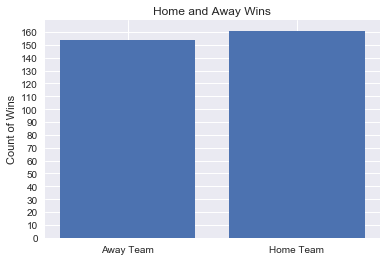

In [19]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Away Team','Home Team'],team_wins_.values.flatten())

# Set the x-axis tick labels to the country names
#
#ax.set_xlabel('Foot')
# Set the y-axis label
ax.set_ylabel('Count of Wins')
ax.set_yticks(np.arange(0,170, step=10))
ax.set_title('Home and Away Wins')

plt.show()

In [21]:
team_wins_.loc[0]

Win          False
home_team      154
Name: 0, dtype: object

In [22]:
#ha: there is statistical difference between home field advantage and wins 
#ho: there is no statistical difference between home field advantage and wins  

away_home_team_df = team_wins_[['Win','home_team']]
away_team = team_wins_.loc[0]
home_team = team_wins_.loc[1]

statistic, pvalue = ttest_ind(away_team ,home_team , equal_var= False,)
alpha = 0.025

print("Pvalue:", float(pvalue)) 
print("Tstat:", float(statistic)) 
if pvalue < alpha:
    print("Null hypothesis rejected, there is a statistical significance between home field advantage and wins  ")
else:
    print("Fail to reject null hypothesis there is no statistical significance between home field advantage and wins  ")

Pvalue: 0.9745394324167843
Tstat: -0.036024342667987104
Fail to reject null hypothesis there is no statistical significance between home field advantage and wins  


there is not enough evidence to identify a difference between home field advantage and wins 
--of your evidence falls short of being able to reject the null

In [23]:
most_wins = df[['home_team','Win']]
most_wins

,home_team,Win
11,James Madison,True
19,Robert Morris,False
90,Gardner-Webb,False
131,Jacksonville,True
142,Hofstra,False
...,...,...
5340,Fairfield,True
5351,Rutgers,True
5362,La Salle,True
5368,Stanford,False


In [24]:
dfwins_ = most_wins[(most_wins['Win'] == True)]
dfwins_

,home_team,Win
11,James Madison,True
131,Jacksonville,True
157,North Carolina,True
177,Florida,True
183,Oregon,True
...,...,...
5141,Stanford,True
5309,Virginia Tech,True
5340,Fairfield,True
5351,Rutgers,True


In [25]:
winning_teams = dfwins_.groupby('home_team')

In [26]:
pd.set_option('display.max_rows', None)
home_teams_value = winning_teams.count()

In [27]:
home_teams_value

,Win
home_team,
Albany,1
Army,2
Binghamton,1
Boston College,2
Boston University,1
Brown,2
Bryant,1
California,1
Campbell,1


In [28]:
sortedwins= home_teams_value.sort_values(by = 'Win' ,ascending=False)

In [29]:
sortedwins.head(5)

,Win
home_team,
Colorado,5
Penn,5
Temple,5
Virginia Tech,5
Southern California,5


In [30]:
dfloss_ = most_wins[(most_wins['Win'] == False)]
dfloss_

,home_team,Win
19,Robert Morris,False
90,Gardner-Webb,False
142,Hofstra,False
213,Elon,False
237,Penn State,False
255,Kennesaw State,False
272,Colgate,False
290,Southern California,False
296,La Salle,False
302,Mount St. Mary's,False


In [31]:
losing_teams = dfloss_.groupby('home_team')

In [32]:
pd.set_option('display.max_rows', None)
lost_teams_value = losing_teams.count()

In [33]:
sortedlose= lost_teams_value.sort_values(by = 'Win' ,ascending=False)

In [34]:
sortedlose.head()

,Win
home_team,
Kennesaw State,5
California,5
Towson,5
Robert Morris,4
Mount St. Mary's,4


In [42]:
days_wins = df[['day_of_week','Win']]
days_wins

,day_of_week,Win
11,6,True
19,6,False
90,0,False
131,5,True
142,6,False
157,6,True
177,0,True
183,1,True
211,3,True
213,4,False


In [43]:
dfdays = days_wins[(days_wins['Win'] == True)]
dfdays

,day_of_week,Win
11,6,True
131,5,True
157,6,True
177,0,True
183,1,True
211,3,True
221,6,True
249,6,True
287,3,True
295,4,True


In [44]:
sortedays= dfdays.sort_values(by = 'Win' ,ascending=False)

In [45]:
sortedays

,day_of_week,Win
11,6,True
2757,0,True
3393,0,True
3437,4,True
3533,6,True
3565,0,True
3575,4,True
3581,5,True
3593,5,True
3605,0,True


In [46]:
days_group= sortedays.groupby('day_of_week')

In [47]:
days_win = days_group.count()

In [41]:
days_win.reset_index(inplace=True)

In [48]:
days_win

,Win
day_of_week,
0,37
1,4
2,4
3,26
4,16
5,25
6,49


In [49]:
days_win.Win.values

array([37,  4,  4, 26, 16, 25, 49])

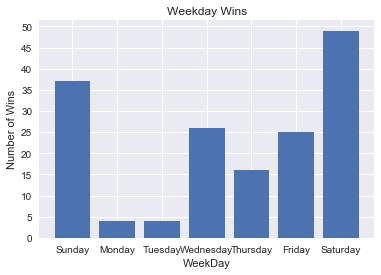

In [50]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'],days_win.Win.values)

# Set the x-axis tick labels to the country names
#
ax.set_xlabel('WeekDay')
# Set the y-axis label
ax.set_ylabel('Number of Wins')
ax.set_yticks(np.arange(0,55, step=5))
ax.set_title('Weekday Wins')

plt.show()

In [54]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'overtime',
       'number_overtimes', 'game_date', 'year', 'month', 'day_of_month',
       'day_of_week', 'neutral_site', 'tournament_game', 'Win'],
      dtype='object')

In [51]:
year = df[['Win','year']]

In [52]:
year_Wins = year[(year['Win'] == True)]
year_Wins

,Win,year
11,True,2018.0
131,True,2018.0
157,True,2018.0
177,True,2018.0
183,True,2018.0
211,True,2018.0
221,True,2018.0
249,True,2018.0
287,True,2018.0
295,True,2018.0


In [53]:
year_Wins.groupby('year').count()

,Win
year,
2014.0,28
2015.0,28
2016.0,32
2017.0,25
2018.0,48


In [ ]:
## in 2018 there were more overtime wins by home teams than in the other 4 years 

In [71]:
df

,home_team,away_team,home_score,away_score,overtime,number_overtimes,game_date,year,month,day_of_month,day_of_week,neutral_site,tournament_game,Win
11,James Madison,North Carolina,15.0,14.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0,True
19,Robert Morris,Bucknell,4.0,5.0,1.0,2.0,21225.0,2018.0,2.0,10.0,6,0.0,0.0,False
90,Gardner-Webb,East Carolina,14.0,15.0,1.0,1.0,21233.0,2018.0,2.0,18.0,0,0.0,0.0,False
131,Jacksonville,Ohio State,17.0,16.0,1.0,1.0,21238.0,2018.0,2.0,23.0,5,0.0,0.0,True
142,Hofstra,Fairfield,12.0,13.0,1.0,1.0,21239.0,2018.0,2.0,24.0,6,0.0,0.0,False
157,North Carolina,Maryland,16.0,15.0,1.0,1.0,21239.0,2018.0,2.0,24.0,6,0.0,0.0,True
177,Florida,Loyola,17.0,16.0,1.0,1.0,21240.0,2018.0,2.0,25.0,0,0.0,0.0,True
183,Oregon,Canisius,12.0,11.0,1.0,1.0,21241.0,2018.0,2.0,26.0,1,0.0,0.0,True
211,Virginia Tech,George Mason,9.0,8.0,1.0,1.0,21243.0,2018.0,2.0,28.0,3,0.0,0.0,True
213,Elon,High Point,13.0,14.0,1.0,1.0,21244.0,2018.0,3.0,1.0,4,0.0,0.0,False


In [54]:
home_win_year = df[['year','home_score','Win']]

In [55]:
win_homes = home_win_year[(home_win_year['Win'] == True)]
win_homes

,year,home_score,Win
11,2018.0,15.0,True
131,2018.0,17.0,True
157,2018.0,16.0,True
177,2018.0,17.0,True
183,2018.0,12.0,True
211,2018.0,9.0,True
221,2018.0,17.0,True
249,2018.0,16.0,True
287,2018.0,14.0,True
295,2018.0,7.0,True


In [56]:
df_clean_wins = win_homes.groupby('year').agg({'home_score':['mean']})
df_clean_wins

,home_score
,mean
year,
2014.0,11.285714
2015.0,11.107142
2016.0,10.375000
2017.0,12.240000
2018.0,12.333333


In [57]:
df_clean_wins.reset_index(inplace=True)

In [58]:
df_clean_wins

,year,home_score
,,mean
0,2014.0,11.285714
1,2015.0,11.107142
2,2016.0,10.375000
3,2017.0,12.240000
4,2018.0,12.333333


In [59]:
df_clean_wins.loc[0]

year                2014.000000
home_score  mean      11.285714
Name: 0, dtype: float64

In [60]:
df_clean_wins.loc[1]

year                2015.000000
home_score  mean      11.107142
Name: 1, dtype: float64

In [61]:
import pandas as pd
from scipy import stats

ttest,pval = stats.ttest_rel(df_clean_wins.loc[0],df_clean_wins.loc[1])
print(pval)
if pval<0.025:
    print("Null hypothesis rejected, there is a statistical significance in the average home score between 2014 and 2015 ")
else:
    print("Fail to reject null hypothesis there is  not a statistical significance in the average home score between 2014 and 2015")
    

print("Pvalue:", float(pvalue)) 
print("Tstat:", float(statistic)) 


0.6124965198312766
Fail to reject null hypothesis there is  not a statistical significance in the average home score between 2014 and 2015
Pvalue: 0.9745394324167843
Tstat: -0.036024342667987104


Based on the results of a paired sample t test 
A lack of evidence only means that you haven’t proven that something exists.
        It does not prove that something doesn’t exist. 
        It might exist, but your study missed it
        only data for overtime games 

In [ ]:
how is this a paired t test, would it be better if i run a test based on home adn away teams score between the years 

In [ ]:
POWER and EFFECT SIZE 